In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import anndata
import scanorama

# sittings
sns.set_style("ticks",{'axes.grid' : True})
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)

# Load the saved AnnData object after labeling

In [2]:
adata = sc.read_h5ad("Labeled_Scanorama.h5ad")

adata

AnnData object with n_obs × n_vars = 157422 × 16975
    obs: 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'leiden', 'cell_type'
    uns: 'Sample_colors', 'cell_type_colors', 'leiden', 'leiden_colors', 'markers', 'neighbors', 'rank_genes_groups', 'umap'
    obsm: 'Scanorama', 'X_scanorama', 'X_umap'
    obsp: 'connectivities', 'distances'

/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


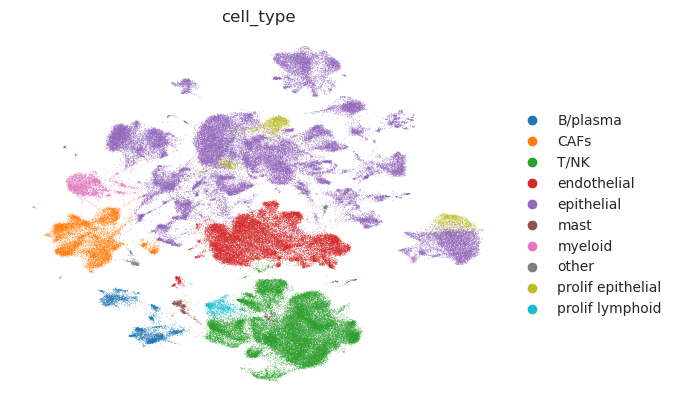

In [3]:
# Plot the cell types using umap
sc.pl.umap(adata, color = ['cell_type'], frameon = False)

# Annotate each patient with its clinicopathologic charactaristics:
* Treatment status.
* Procedure of extracting the sample.
* Moffitt subtype.
* Stage of the tumor.

In [4]:
treatment = {
"1":"Naive",
"2":"Naive",
"3":"Treated",
"4":"Naive",
"5":"Naive",
"6":"Treated",
"7":"Naive",
"8":"Treated",
"9":"Naive",
"10":"Treated",
"11":"Naive",
"12":"Treated",
"13":"Naive",
"14":"Treated",
"15":"Naive",
"16":"Naive",
"17":"Treated",
"18":"Naive",
"19":"Naive",
"20":"Naive",
"21":"Naive",
"22":"Naive",
"23":"Naive",
"24":"Naive",
"25":"Naive",
"26":"Naive",
"27":"Naive"
}

# Mape the treatment to the Sample
adata.obs['treatment'] = adata.obs.Sample.map(treatment)

In [5]:
procedure = {
"1":"Liver-Biopsy",
"2":"Liver-Biopsy",
"3":"Resection",
"4":"Resection",
"5":"Resection",
"6":"EUS-Biopsy",
"7":"Resection",
"8":"Resection",
"9":"EUS-Biopsy",
"10":"Resection",
"11":"Liver-Biopsy",
"12":"EUS-Biopsy",
"13":"EUS-Biopsy",
"14":"Resection",
"15":"Resection",
"16":"Liver-Biopsy",
"17":"Liver-Biopsy",
"18":"Liver-Biopsy",
"19":"Resection",
"20":"EUS-Biopsy",
"21":"Liver-Biopsy",
"22":"EUS-Biopsy",
"23":"Resection",
"24":"Liver-Biopsy",
"25":"Liver-Biopsy",
"26":"EUS-Biopsy",
"27":"Liver-Biopsy"
}

# Mape the procedure to the Sample
adata.obs['procedure'] = adata.obs.Sample.map(procedure)

In [6]:
moffitt = {
"1":"Classical",
"2":"Intermediate",
"3":"Intermediate",
"4":"Classical",
"5":"Classical",
"6":"Intermediate",
"7":"Classical",
"8":"Classical",
"9":"Classical",
"10":"Intermediate",
"11":"Basal",
"12":"Classical",
"13":"Intermediate",
"14":"Basal",
"15":"Intermediate",
"16":"Classical",
"17":"Basal",
"18":"Basal",
"19":"Intermediate",
"20":"Classical",
"21":"Intermediate",
"22":"Intermediate",
"23":"Classical",
"24":"Intermediate",
"25":"Intermediate",
"26":"Intermediate",
"27":"Intermediate"
}

# Mape the moffitt to the Sample
adata.obs['moffitt'] = adata.obs.Sample.map(moffitt)

In [7]:
stage = {
"1":"Metastatic",
"2":"Metastatic",
"3":"Resectable",
"4":"Resectable",
"5":"Resectable",
"6":"Borderline",
"7":"Resectable",
"8":"Borderline",
"9":"Metastatic",
"10":"Borderline",
"11":"Metastatic",
"12":"Metastatic",
"13":"Borderline",
"14":"Resectable",
"15":"Resectable",
"16":"Metastatic",
"17":"Metastatic",
"18":"Metastatic",
"19":"Resectable",
"20":"Metastatic",
"21":"Metastatic",
"22":"Borderline",
"23":"Resectable",
"24":"Metastatic",
"25":"Metastatic",
"26":"Metastatic",
"27":"Metastatic"
}

# Mape the stage to the Sample
adata.obs['stage'] = adata.obs.Sample.map(stage)

# Plot the clinicopathologic charactaristics using UMAP

/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


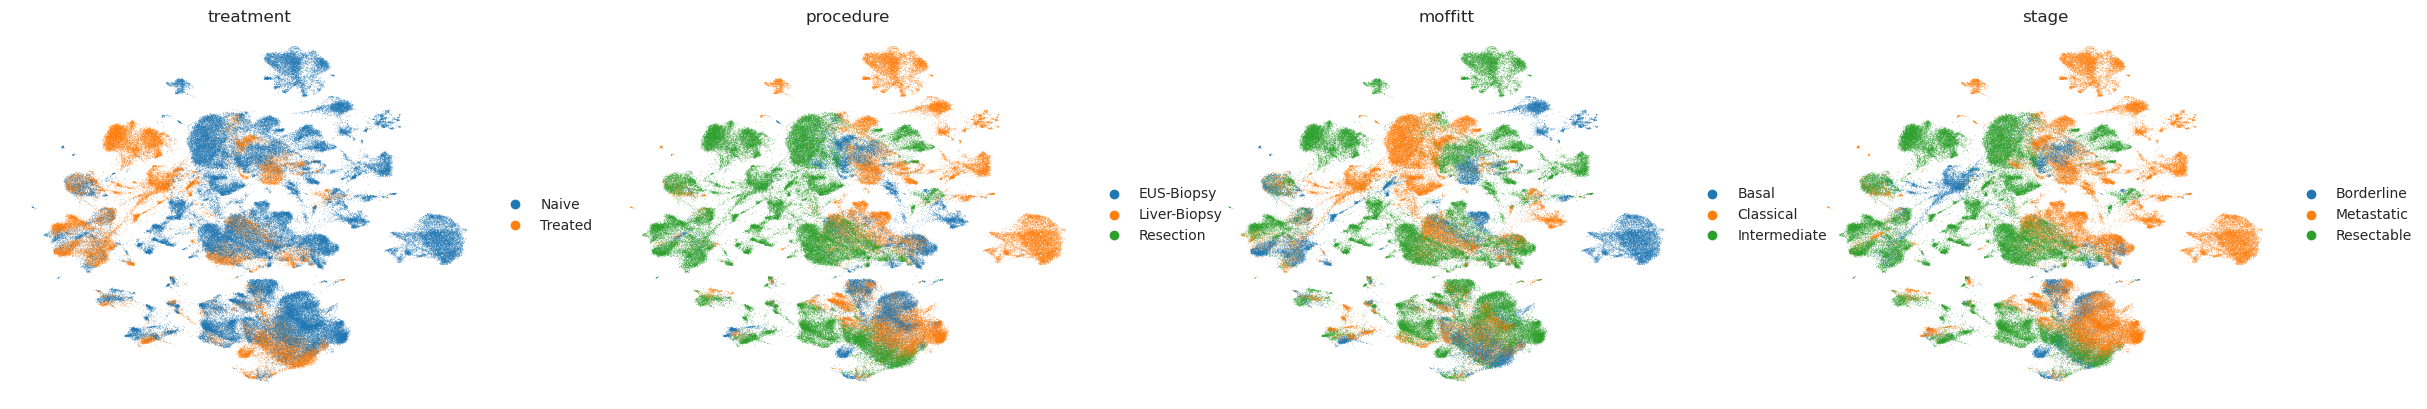

In [8]:
sc.pl.umap(adata, color = ['treatment', 'procedure', 'moffitt', 'stage'], frameon = False)

# Save the UMAP plots

In [9]:
# Save the clinicopathologic charactaristics umap plots each alone
for charactaristic in ['treatment', 'procedure', 'moffitt', 'stage']:
    sc.pl.umap(adata, color = charactaristic, frameon = False, save=f"{charactaristic}.png", show=False)
    
# Save the clinicopathologic charactaristics umap plots each alone
for charactaristic in ['treatment', 'procedure', 'moffitt', 'stage']:
    sc.pl.umap(adata, color = ['cell_type', charactaristic], frameon = False, save=f"cell_type_vs_{charactaristic}.png", show=False)
    
# Save a comparison between each two clinicopathologic charactaristics umap plots
for charactaristic_1 in ['treatment', 'procedure', 'moffitt', 'stage']:
    for charactaristic_2 in ['treatment', 'procedure', 'moffitt', 'stage']:
        if charactaristic_1 != charactaristic_2:
            sc.pl.umap(adata, color = [charactaristic_1, charactaristic_2], frameon = False, save=f"{charactaristic_1}_vs_{charactaristic_2}.png", show=False)

/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


# Save the AnnData object in h5ad format

In [10]:
adata.write_h5ad('characterized.h5ad')